<h1>Part 1: Data Preprocessing

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Load the dataset, replace null or missing values if needed. 

In [254]:
file_path = 'Data/AirQualityUCI.xlsx'
df = pd.read_excel(file_path)

In [255]:
df.fillna(method='ffill', inplace=True)

Drop ‘Date’ and ‘Time’ columns and plot correlation matrix for the rest of data.

In [256]:
df.drop(['Date', 'Time'], axis=1, inplace=True)

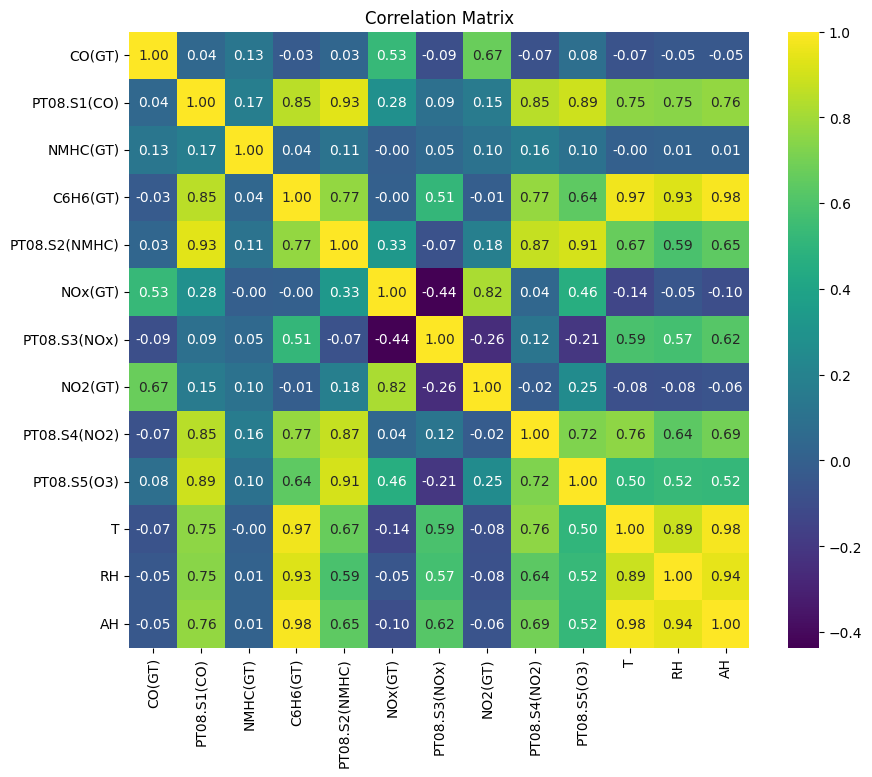

In [257]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

‘PT08.S4(NO2)’ is your label, decide any 4 features which highly correlates with the label.

In [258]:
selected_features = correlation_matrix['PT08.S4(NO2)'].sort_values(ascending=False).index[1:5]
print("Selected Features:", selected_features)

Selected Features: Index(['PT08.S2(NMHC)', 'PT08.S1(CO)', 'C6H6(GT)', 'T'], dtype='object')


Plot any 2 graphs on the final dataset.

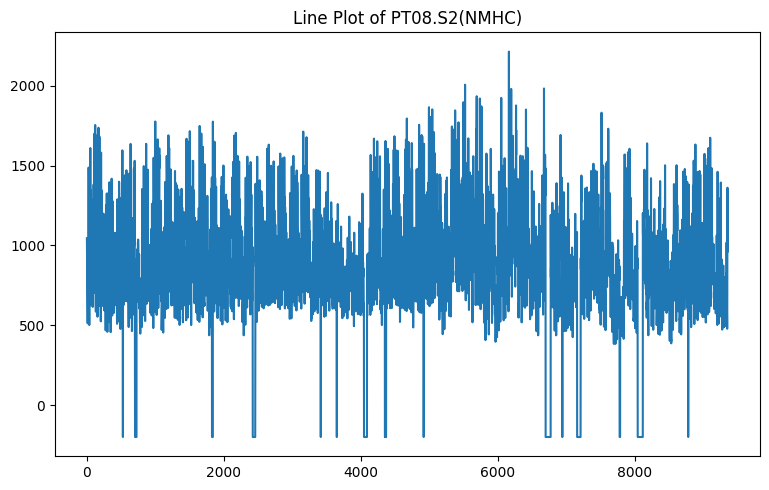

In [259]:
# Plot the first feature using a line plot
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
selected_data[selected_features[0]].plot(title=f'Line Plot of {selected_features[0]}')

plt.tight_layout()
plt.show()


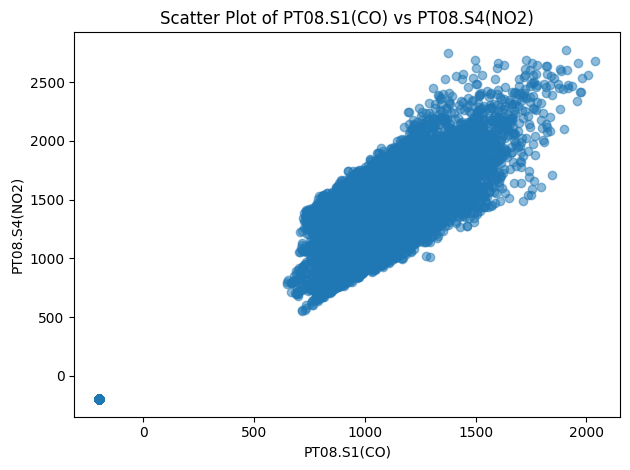

In [260]:
# Plot the second feature using a scatter plot
plt.subplot(1, 1, 1)
plt.scatter(selected_data[selected_features[1]], df[label_column], alpha=0.5)
plt.title(f'Scatter Plot of {selected_features[1]} vs {label_column}')
plt.xlabel(selected_features[1])
plt.ylabel(label_column)

plt.tight_layout()
plt.show()

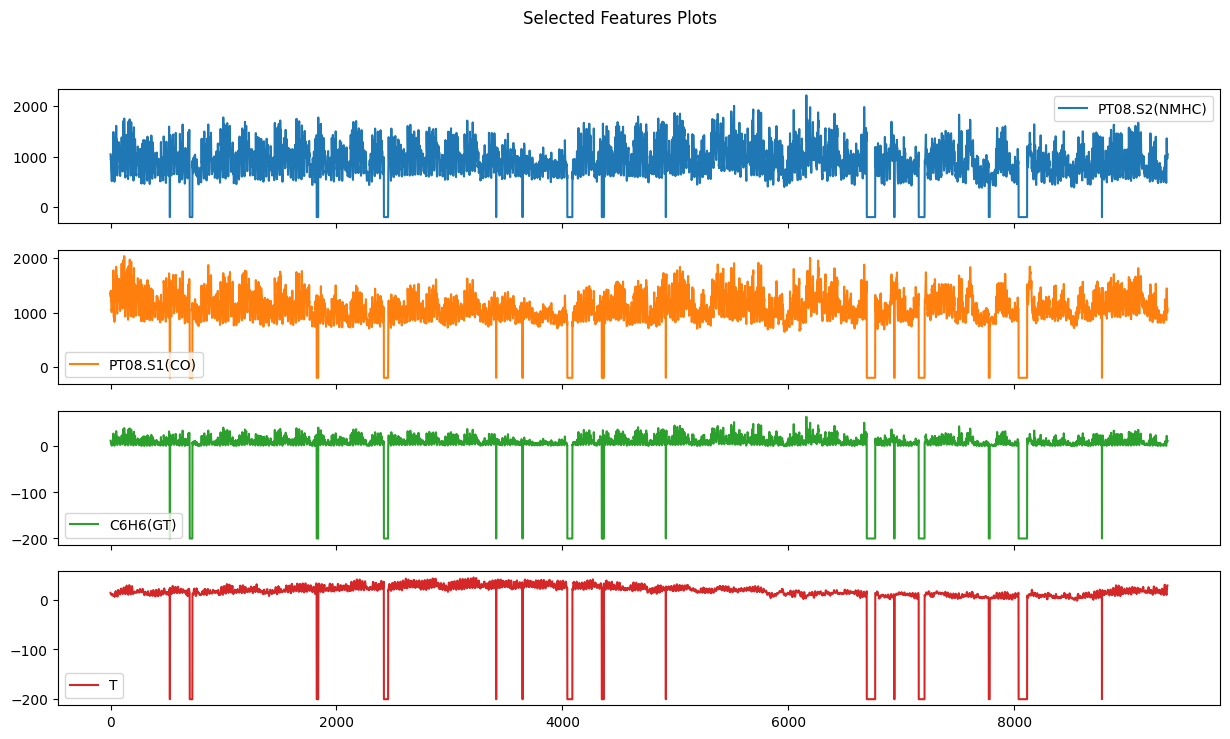

In [261]:
selected_data.plot(subplots=True, figsize=(15, 8))
plt.suptitle('Selected Features Plots')
plt.show()

Apply ‘MinMaxScaler()’ transformation on the final data to keep it in a particular range.

In [262]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

Split data into train and test sets.

In [263]:
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]


Create sequence for time series analysis, keep sequence length = 10

In [264]:
def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        sequence = data[i:(i + sequence_length), :]
        label = data[i + sequence_length, 8]  # 8 is the index of 'PT08.S4(NO2)'
        sequences.append(sequence)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 10
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (7475, 10, 13)
y_train shape: (7475,)
X_test shape: (1862, 10, 13)
y_test shape: (1862,)


<h1>Part 2: Modeling and Evaluation

In [265]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

Implement RNN and LSTM on the prepared data using TensorFlow library

In [266]:
def create_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(units=50, activation='relu', input_shape=input_shape))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [267]:
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=input_shape))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

Train the models for at least 20 epochs.<br>
Save both trained models.

In [268]:
rnn_model = create_rnn_model((X_train.shape[1], X_train.shape[2]))
rnn_model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
234/234 [==============================] - 2s 3ms/step - loss: 0.0074
Epoch 2/20
234/234 [==============================] - 1s 3ms/step - loss: 0.0043
Epoch 3/20
234/234 [==============================] - 1s 3ms/step - loss: 0.0038
Epoch 4/20
234/234 [==============================] - 1s 3ms/step - loss: 0.0034
Epoch 5/20
234/234 [==============================] - 1s 3ms/step - loss: 0.0032
Epoch 6/20
234/234 [==============================] - 1s 3ms/step - loss: 0.0032
Epoch 7/20
234/234 [==============================] - 1s 3ms/step - loss: 0.0032
Epoch 8/20
234/234 [==============================] - 1s 3ms/step - loss: 0.0031
Epoch 9/20
234/234 [==============================] - 1s 3ms/step - loss: 0.0030
Epoch 10/20
234/234 [==============================] - 1s 3ms/step - loss: 0.0030
Epoch 11/20
234/234 [==============================] - 1s 3ms/step - loss: 0.0029
Epoch 12/20
234/234 [==============================] - 1s 4ms/step - loss: 0.0029
Epoch 13/20
234/234 [====

In [269]:
rnn_model.save('rnn_model.h5')

C:\Users\anany\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [270]:
lstm_model = create_lstm_model((X_train.shape[1], X_train.shape[2]))
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
234/234 [==============================] - 3s 7ms/step - loss: 0.0128
Epoch 2/20
234/234 [==============================] - 1s 6ms/step - loss: 0.0050
Epoch 3/20
234/234 [==============================] - 1s 6ms/step - loss: 0.0038
Epoch 4/20
234/234 [==============================] - 1s 5ms/step - loss: 0.0036
Epoch 5/20
234/234 [==============================] - 1s 5ms/step - loss: 0.0036
Epoch 6/20
234/234 [==============================] - 1s 6ms/step - loss: 0.0033
Epoch 7/20
234/234 [==============================] - 1s 5ms/step - loss: 0.0033
Epoch 8/20
234/234 [==============================] - 1s 5ms/step - loss: 0.0033
Epoch 9/20
234/234 [==============================] - 1s 5ms/step - loss: 0.0032
Epoch 10/20
234/234 [==============================] - 1s 5ms/step - loss: 0.0032
Epoch 11/20
234/234 [==============================] - 1s 5ms/step - loss: 0.0031
Epoch 12/20
234/234 [==============================] - 1s 5ms/step - loss: 0.0032
Epoch 13/20
234/234 [====

In [271]:
lstm_model.save('lstm_model.h5')

Read the saved model and then apply it to the test set

In [272]:
loaded_rnn_model = tf.keras.models.load_model("rnn_model.h5")
loaded_lstm_model = tf.keras.models.load_model("lstm_model.h5")

In [273]:
rnn_predictions = loaded_rnn_model.predict(X_test)
lstm_predictions = loaded_lstm_model.predict(X_test)

59/59 [==============================] - 0s 4ms/step


Only use 30% of the test data to clearly visualize the output<br>
Your output graph should include both predicted and actual plots in different colors

In [274]:
test_size = int(0.3 * len(y_test))

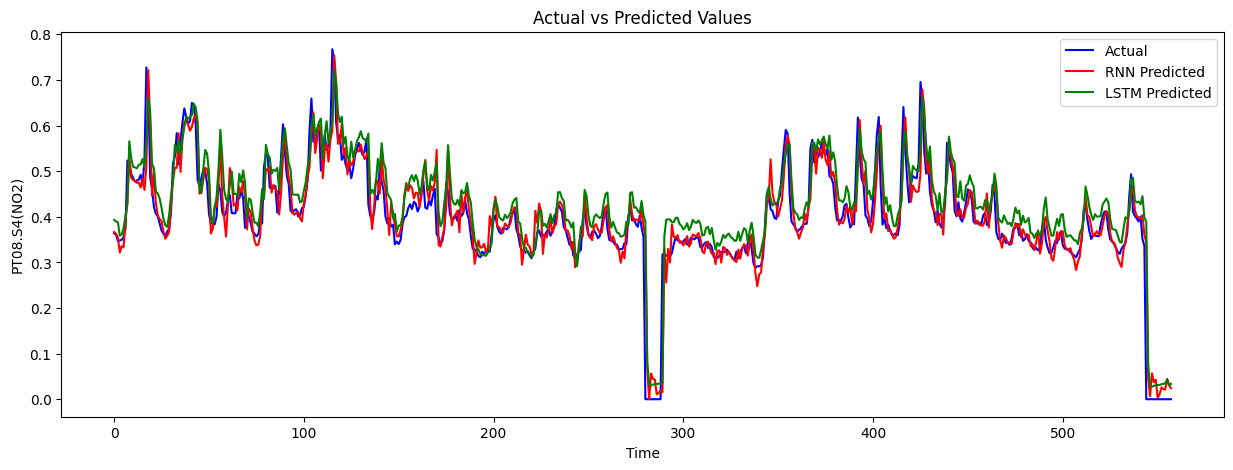

In [275]:
plt.figure(figsize=(15, 5))
plt.plot(y_test[:test_size], label='Actual', color='blue')
plt.plot(rnn_predictions[:test_size], label='RNN Predicted', color='red')
plt.plot(lstm_predictions[:test_size], label='LSTM Predicted', color='green')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('PT08.S4(NO2)')
plt.legend()
plt.show()

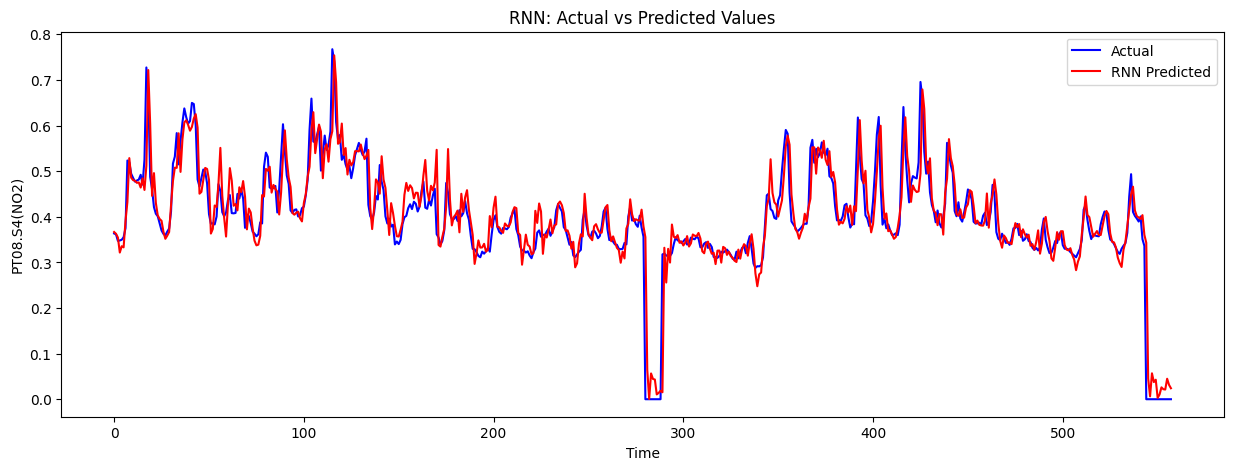

In [276]:
plt.figure(figsize=(15, 5))
plt.plot(y_test[:test_size], label='Actual', color='blue')
plt.plot(rnn_predictions[:test_size], label='RNN Predicted', color='red')
plt.title('RNN: Actual vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('PT08.S4(NO2)')
plt.legend()
plt.show()

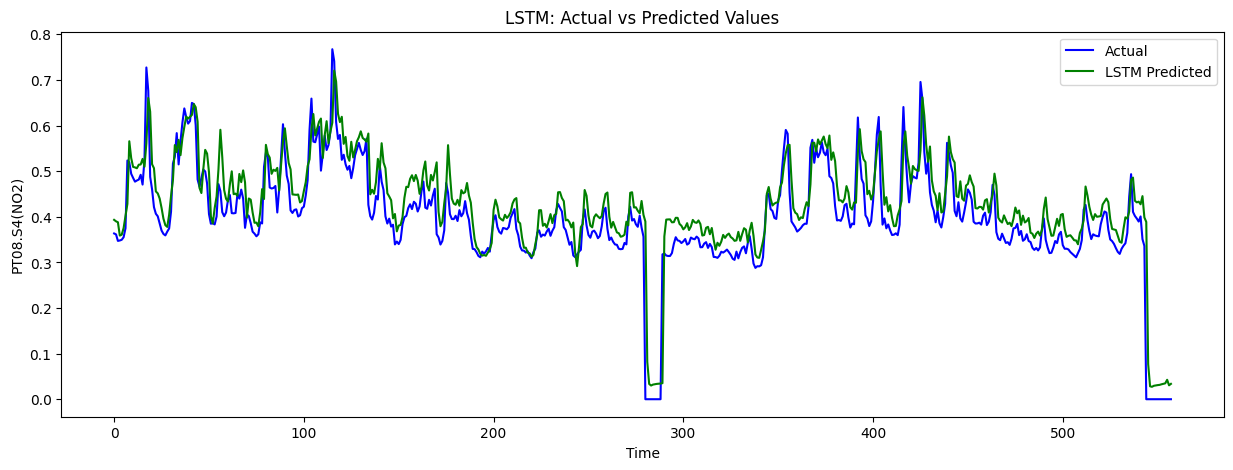

In [277]:
plt.figure(figsize=(15, 5))
plt.plot(y_test[:test_size], label='Actual', color='blue')
plt.plot(lstm_predictions[:test_size], label='LSTM Predicted', color='green')
plt.title('LSTM: Actual vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('PT08.S4(NO2)')
plt.legend()
plt.show()